In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Experiment 3

In [47]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp3"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,int(i.split(".")[0]),100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [48]:
final_df.to_csv('../results/processed/exp3.csv')

In [3]:
df = pd.read_csv('../results/processed/exp3.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [4]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [8]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)


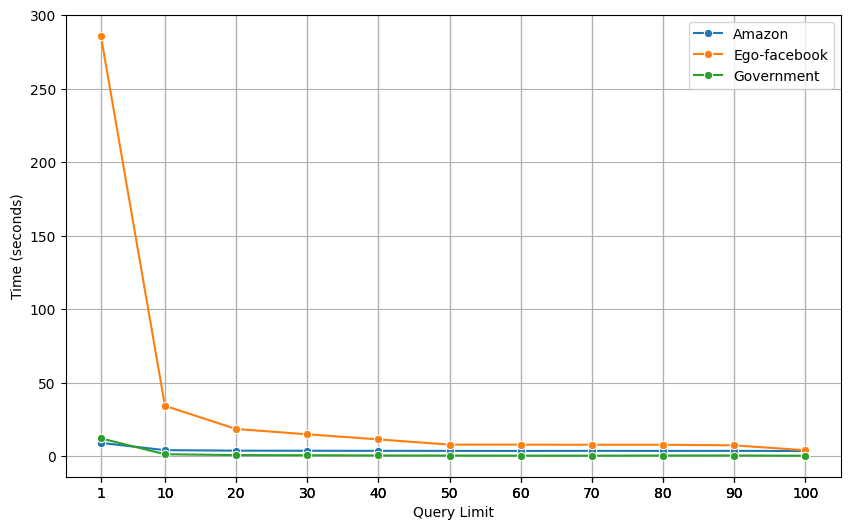

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Query Limit', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('Effect of Query Limit')
plt.xlabel('Query Limit')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df['Query Limit'])
plt.savefig("../plots/limitqueries.png")
#plt.show()

In [7]:
plt.savefig("../plots/limitqueries.png")

<Figure size 640x480 with 0 Axes>

# Experiment 5

In [77]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","core Value", "Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp5"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,int(i.split(".")[0]),100,100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [78]:
final_df.to_csv("../results/processed/exp5.csv")

In [10]:
df = pd.read_csv('../results/processed/exp5.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [11]:
df = df[df['graph'].isin(['orani','ego-facebook','government'])]

In [14]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)


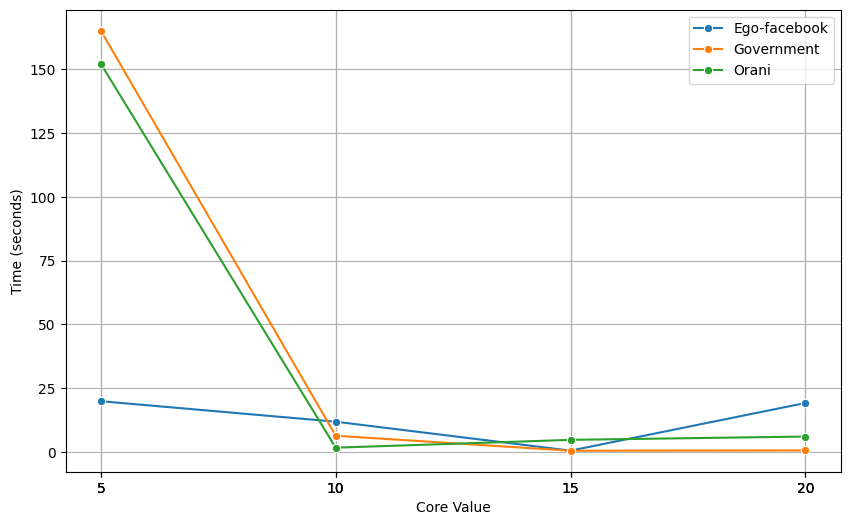

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='core Value', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('Effect of Core Value')
plt.xlabel('Core Value')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df['core Value'])
plt.savefig("../plots/coreValue.png")
#plt.show()

# Experiment 6

In [4]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID", "Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp6/l"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        df['Time'] = df['Time'].astype("str")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,100,100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [5]:
final_df.head()

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime,Min Time,Max Time,Time
0,amazon_q,12,21,238357,100,100,1,0,199,956,"58,813"
1,amazon_q,15,21,238357,100,100,1,0,198,947,"59,305"
2,amazon_q,18,21,238357,100,100,1,0,197,964,"45,854"
3,amazon_q,3,21,238357,100,100,1,0,200,954,"47,650"
4,amazon_q,6,21,238357,100,100,1,0,200,951,"81,943"


In [6]:
final_df.to_csv("../results/processed/exp6_l.csv")

In [16]:
df = pd.read_csv('../results/processed/exp6_l.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [17]:
df = df[df['graph'].isin(['orani','ego-facebook','government'])]

In [18]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

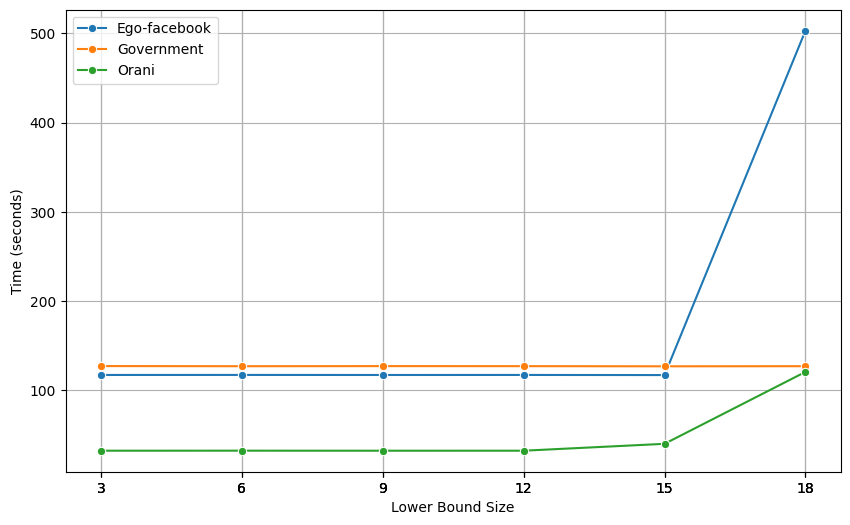

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='N1', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('l VS Time')
plt.xlabel('Lower Bound Size')
plt.ylabel('Time (seconds)')
#plt.yscale("log")
plt.grid(True)
plt.legend()
plt.xticks(df['N1'])
plt.savefig("../plots/l.png")
#plt.show()

In [46]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID", "Query Limit","Total Queries", "Degree","Overtime","Min Time", "Max Time","Time"])
path = "../results/exp6/h"
graphs = os.listdir(path)
for  graph in graphs:
    new_path = os.path.join(path,graph)
    res = os.listdir(new_path)
    for i in res:
        df = pd.read_csv(os.path.join(new_path,i),sep="|")
        df['Time'] = df['Time'].astype("str")
        max_time  = max([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        min_time  = min([int(i.replace(",","")) for i in list(df['Time'])[:-1]])
        time = df.iloc[len(df)-1]["TotalTime"]
        
        n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
        overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,100,100,degree,overtime,min_time,max_time,time]
        #print(i,len(df))
    

In [51]:
final_df.head()

,graph,N1,N2,QID,Query Limit,Total Queries,Degree,Overtime,Min Time,Max Time,Time
0,amazon_q,3,12,238357,100,100,1,0,154,842,"65,186"
1,amazon_q,3,15,238357,100,100,1,0,165,858,"187,323"
2,amazon_q,3,18,238357,100,100,1,0,185,895,"57,207"
3,amazon_q,3,21,238357,100,100,1,0,201,963,"59,206"
4,amazon_q,3,6,238357,100,100,1,0,133,803,"40,921"


In [47]:
final_df.to_csv("../results/processed/exp6_h.csv")

In [25]:
df = pd.read_csv('../results/processed/exp6_h.csv',index_col=0)
time = [float(i.replace(",",""))/1000000 for i in df['Time']] 
df['Time'] = time

In [26]:
df = df[df['graph'].isin(['orani','ego-facebook','government'])]

In [27]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

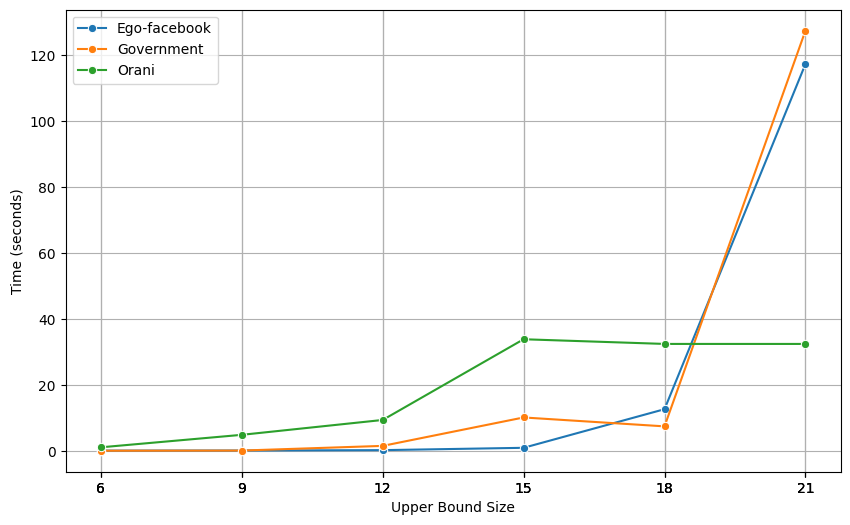

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='N2', y='Time', hue='graph', marker='o')
#plt.yscale('log')
#plt.title('h VS Time')
plt.xlabel('Upper Bound Size')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df['N2'])
plt.savefig("../plots/h.png")
#plt.show()

# Experiment 7

In [59]:
path = "../results/exp7/"
graphs = os.listdir(path)
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime /R1","Time /R1","Overtime /R2","Time /R2","Overtime /R3","Time /R3","Overtime all","Time all"])
for graph in graphs:
    row = [graph]
    new_path = os.path.join(path,graph)
    for j in ['r1.txt','r2.txt','r3.txt','all.txt']:
        df = pd.read_csv(os.path.join(new_path,j),sep="|")
        time  = df.iloc[len(df)-1]["TotalTime"]
        overtime = 0 if (df['Overtime'][:-1]==0).all() else 1
        if j == "r1.txt":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],100,100,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [overtime,time]
    final_df.loc[len(final_df)] = row

In [62]:
final_df.to_csv("../results/processed/exp7.csv")

In [43]:
df = pd.read_csv("../results/processed/exp7.csv",index_col=0)
df["Time /R1"] = [float(i.replace(",",""))/(1000000) for i in df["Time /R1"]]
df["Time /R2"] = [float(i.replace(",",""))/(1000000) for i in df["Time /R2"]]
df["Time /R3"] = [float(i.replace(",",""))/(1000000) for i in df["Time /R3"]]
df["Time all"] = [float(i.replace(",",""))/(1000000) for i in df["Time all"]]

In [44]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [45]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

In [93]:
df['graph'].unique()

array(['amazon_q', 'ego-facebook', 'government'], dtype=object)

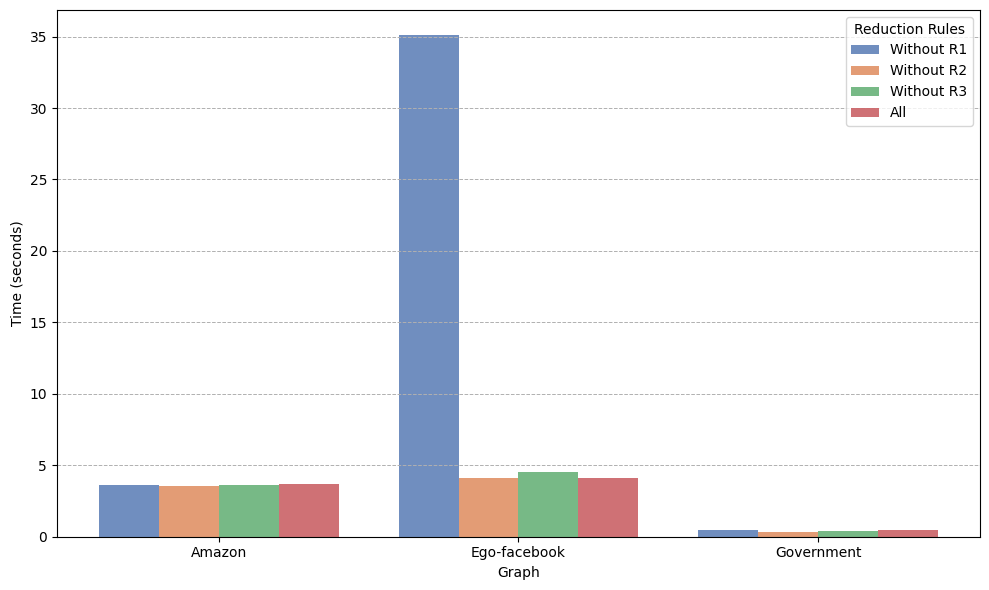

In [46]:
plt.figure(figsize=(10, 6))

columns = ['Time /R1', 'Time /R2', 'Time /R3', 'Time all']
labels = ["Without R1", "Without R2", "Without R3", "All"]
palette = sns.color_palette("deep", len(columns))
bar_width = 0.2  # Adjust the width of each bar
x = np.arange(len(df['graph']))  # the label locations

for i, col in enumerate(columns):  
    plt.bar(x + i * bar_width, df[col], width=bar_width, label=labels[i], color=palette[i], alpha=0.8)

plt.xticks(x + bar_width * 1.5, df['graph'])  # Centering the tick labels
#plt.yscale('log')

plt.xlabel('Graph')
plt.ylabel('Time (seconds)')
#plt.title('Effect of Reduction Rules')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend(title="Reduction Rules")
plt.tight_layout()
plt.savefig("../plots/reductionRules.png")
plt.show()


# Experiment 8

In [79]:
path = "../results/exp8/"
graphs = os.listdir(path)
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime /p1","Time /p1","Overtime /p2","Time /p2","Overtime all","Time all"])
for graph in graphs:
    row = [graph]
    new_path = os.path.join(path,graph)
    for j in ['p1.txt','p2.txt','all.txt']:
        df = pd.read_csv(os.path.join(new_path,j),sep="|")
        time  = df.iloc[len(df)-1]["TotalTime"]
        overtime = 0 if (df['Overtime'][:-1]==0).all() else 1
        if j == "p1.txt":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],100,100,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [overtime,time]
    final_df.loc[len(final_df)] = row

In [88]:
final_df.to_csv("../results/processed/exp8.csv")

In [47]:
df = pd.read_csv("../results/processed/exp8.csv",index_col=0)
df["Time /p1"] = [float(i.replace(",",""))/1000000 for i in df["Time /p1"]]
df["Time /p2"] = [float(i.replace(",",""))/1000000 for i in df["Time /p2"]]
df["Time all"] = [float(i.replace(",",""))/1000000 for i in df["Time all"]]

In [48]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [49]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

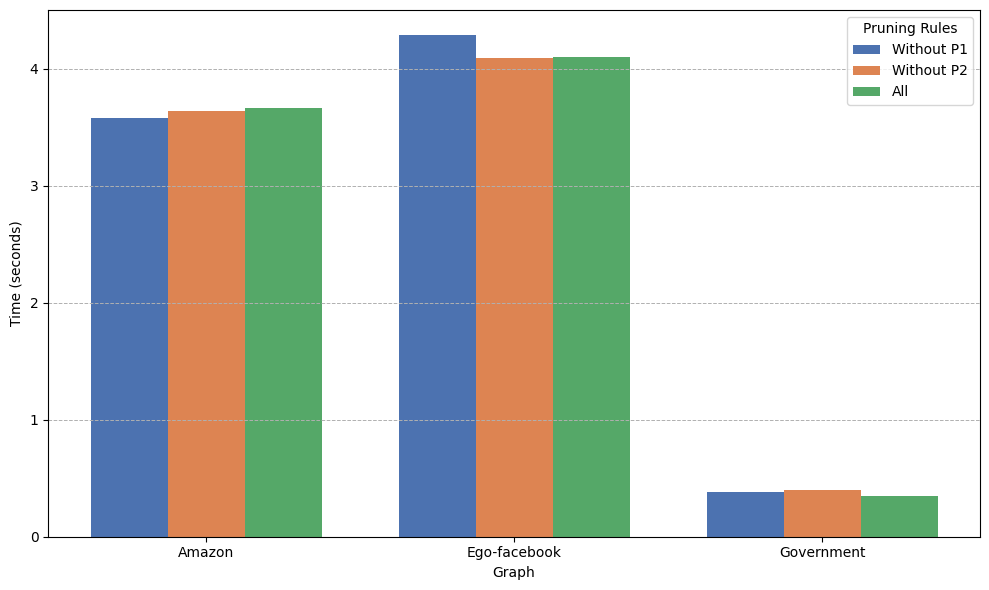

In [50]:
plt.figure(figsize=(10, 6))

columns = ['Time /p1', 'Time /p2', 'Time all']
labels = ["Without P1", "Without P2", "All"]
palette = sns.color_palette("deep", len(columns))
bar_width = 0.25  # Width of each bar
x = np.arange(len(df['graph']))  # the label locations

for i, col in enumerate(columns):
    plt.bar(x + i * bar_width, df[col], width=bar_width, label=labels[i], color=palette[i], alpha=1)

plt.xticks(x + bar_width, df['graph'])  # Centering the tick labels
#plt.yscale('log')

plt.xlabel('Graph')
plt.ylabel('Time (seconds)')
#plt.title('Effect of Branch Pruning')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend(title="Pruning Rules")
plt.tight_layout()
plt.savefig("../plots/branchPruning.png")


# Experiment 9

In [71]:
path = "../results/exp9/"
graphs = os.listdir(path)
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries", "Degree","Overtime next","Time next","Overtime jump","Time jump","Overtime numtask","Time numtask","Overtime space","Time space"])
for graph in graphs:
    row = [graph]
    new_path = os.path.join(path,graph)
    for j in ['next.txt','jump.txt','numTask.txt','space.txt']:
        df = pd.read_csv(os.path.join(new_path,j),sep="|")
        time  = df.iloc[len(df)-1]["TotalTime"]
        overtime = 0 if (df['Overtime'][:-1]==0).all() else 1
        if j == "next.txt":
            row += [df.iloc[0]["N1"], df.iloc[0]["N2"], df.iloc[0]["QID"],100,100,df.iloc[0]["Degree"],overtime,time]
        else:
            row += [overtime,time]
    final_df.loc[len(final_df)] = row

In [74]:
final_df.to_csv("../results/processed/exp9.csv")

In [37]:
df = pd.read_csv("../results/processed/exp9.csv",index_col=0)
df["Time next"] = [float(i.replace(",",""))/1000000 for i in df["Time next"]]
df["Time jump"] = [float(i.replace(",",""))/1000000 for i in df["Time jump"]]
df["Time numtask"] = [float(i.replace(",",""))/1000000 for i in df["Time numtask"]]
df["Time space"] = [float(i.replace(",",""))/1000000 for i in df["Time space"]]


In [38]:
df = df[df['graph'].isin(['amazon_q','ego-facebook','government'])]

In [39]:
df.replace("amazon_q","Amazon",inplace=True)
df.replace("ego-facebook","Ego-facebook",inplace=True)
df.replace("government","Government",inplace=True)
df.replace("orani","Orani",inplace=True)

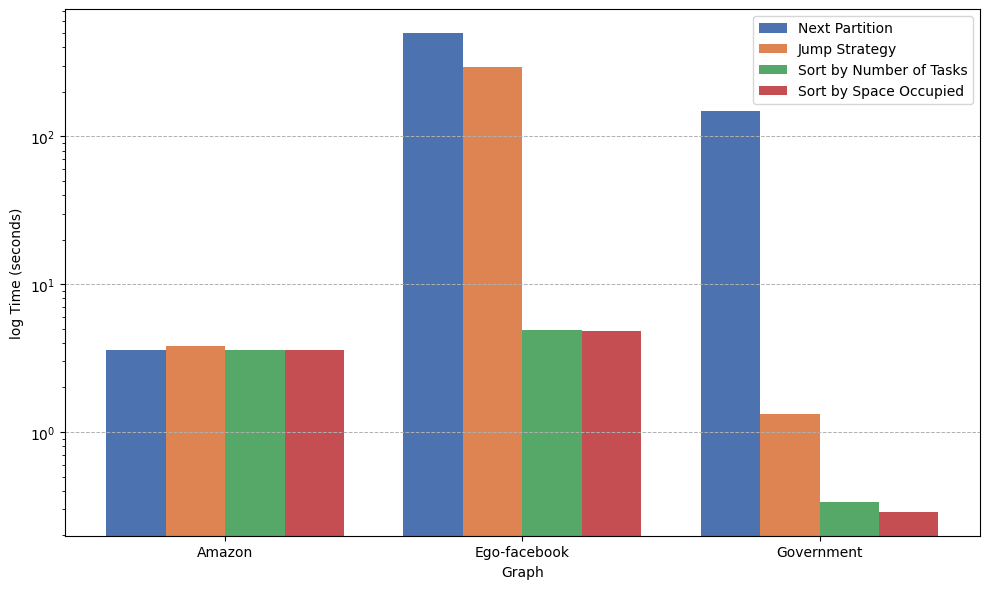

In [40]:
plt.figure(figsize=(10, 6))

columns = ['Time next', 'Time jump', 'Time numtask', 'Time space']
labels = ["Next Partition", "Jump Strategy", "Sort by Number of Tasks", "Sort by Space Occupied"]
palette = sns.color_palette("deep", len(columns))
bar_width = 0.2  # Width of each bar (smaller to fit 4 bars without overlap)
x = np.arange(len(df['graph']))  # the label locations

# Loop to plot each column with adjusted x positions
for i, col in enumerate(columns):
    plt.bar(x + i * bar_width - (1.5 * bar_width), df[col], width=bar_width, label=labels[i], color=palette[i], alpha=1)

# Center the x-ticks
plt.xticks(x, df['graph'])

# Set labels and title
plt.xlabel('Graph')
plt.ylabel('log Time (seconds)')
plt.yscale('log')
#plt.title('Task Management Strategies')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("../plots/taskManagement.png")
